In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
df1 = pd.read_csv("/home/udit/Documents/cognet/data_full.csv")




X_train=np.array(df1.iloc[:,:3])
X_train = preprocessing.normalize(X_train)
Y_train=np.array(df1.iloc[:,3:])
Y_train = preprocessing.normalize(Y_train)
df2 = pd.read_csv("/home/udit/Documents/cognet/data_micro_antenna.csv")
X_test=np.array(df2.iloc[:,:3])
X_test = preprocessing.normalize(X_test)
Y_test=np.array(df2.iloc[:,3:5])
Y_test = preprocessing.normalize(Y_test)
X_train=X_train.T
Y_train=Y_train.T
X_test=X_test.T
Y_test=Y_test.T

#print(X_train.T)
#print(Y_train.T)

/home/udit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Initialise parameters 
#Sigmoid 
#Relu
#Sigmoid_b
#Relu_b 
#Linear_for
#Linear_activation_for
#Forward_prop
#Cost
#Linear_b
#Linear_activation_b
#Backpropagation 
#Update_parameters
#NN_model
#Predict

In [3]:
def initialise_parameters(layer_dims):
    np.random.seed(3)
    l = len(layer_dims)
    parameters={}
    for i in range (1,l):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((layer_dims[i],1))
        
    return parameters


In [4]:
layers_dims = [3,7,4,2]
#print(initialise_parameters(r))
parameters=initialise_parameters(layers_dims)
print(parameters['W'+str(1)].shape)
print(parameters['b'+str(1)].shape)
print(parameters['W'+str(2)].shape)
print(parameters['b'+str(2)].shape)
print(parameters['W'+str(3)].shape)
print(parameters['b'+str(3)].shape)

(7, 3)
(7, 1)
(4, 7)
(4, 1)
(2, 4)
(2, 1)


In [5]:
#sigmoid 
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    cache = z
    return s,cache;

In [6]:
#relu
def relu(Z):
    
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache


In [7]:
#linear_forward
def linear_for(A,W,b):
    z = np.dot(W,A)+b
    
    cache = (A,W,b)
    return z,cache

In [8]:
#linear_activation_forward
def linear_activation_for(A,W,b,fun):
    if fun == 'sigmoid':
      
        z,linear_cache = linear_for(A,W,b)
     
        A,activation_cache = sigmoid(z)
        #print(A.shape)
        
    elif fun == 'relu':
   
        z,linear_cache = linear_for(A,W,b)
        A,activation_cache = relu(z)    
        #print(A.shape)
        
    cache=(linear_cache,activation_cache)
    return A,cache;

In [9]:
#forward_prop
def forward_prop(X,parameters):
    
    L = len(parameters)//2
    A = X
    caches=[]
    
    for i in range (1,L):
        A_prev = A
    
        A,cache = linear_activation_for(A_prev,parameters['W'+str(i)],parameters['b'+str(i)],fun='sigmoid')
        caches.append(cache)
        
        
    A,cache = linear_activation_for(A,parameters['W'+str(L)],parameters['b'+str(L)],fun='relu')
    caches.append(cache)
    return A,caches;

In [10]:
A,caches = forward_prop(X_train,parameters)
#print(A)
#print(caches)

In [11]:
#cost function
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost =np.sum((AL-Y)**2)/(2*m)
    #cost=cost/(2*m)
    
    return cost;

In [12]:
#print(A.shape)
#print(Y_train.shape)
c=compute_cost(A,Y_train)
print(c)

0.4831874935615264


In [13]:
def relu_back(dA, cache):
    
   
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ;

In [14]:
def sigmoid_back(dA , cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    #print(dA.shape)
    #print(s.shape)
    dZ = dA * s * (1-s)

    
    return dZ;

In [15]:
def linear_back(dZ,cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m*(np.dot(dZ,A_prev.T))
    db = 1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev,dW,db

In [16]:
def linear_activation_back(dA,cache,activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_back(dA, activation_cache)
        dA_prev, dW, db = linear_back(dZ, linear_cache)
        
        
    elif activation == "sigmoid":
        
        dZ = sigmoid_back(dA, activation_cache)
        dA_prev, dW, db = linear_back(dZ, linear_cache)
        
    
    return dA_prev, dW, db

In [23]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    dAL = (AL-Y)
    

    current_cache = caches[L-1]
   
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_back(dAL, current_cache, activation = 'relu')


    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        
        dA_prev_temp, dW_temp, db_temp = linear_activation_back(grads["dA"+str(l+1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [24]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-learning_rate*grads['dW'+str(l+1)]
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-learning_rate*grads['db'+str(l+1)]
   
    return parameters

In [25]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):#lr was 0.009
    
    np.random.seed(1)
    costs = []             
    
    parameters = initialise_parameters(layers_dims)
    
    for i in range(0, num_iterations):

        
        AL, caches = forward_prop(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.483187
Cost after iteration 100: 0.037376
Cost after iteration 200: 0.029816
Cost after iteration 300: 0.029698
Cost after iteration 400: 0.029696
Cost after iteration 500: 0.029696
Cost after iteration 600: 0.029696
Cost after iteration 700: 0.029696
Cost after iteration 800: 0.029696
Cost after iteration 900: 0.029696
Cost after iteration 1000: 0.029696
Cost after iteration 1100: 0.029696
Cost after iteration 1200: 0.029696
Cost after iteration 1300: 0.029696
Cost after iteration 1400: 0.029696
Cost after iteration 1500: 0.029696
Cost after iteration 1600: 0.029696
Cost after iteration 1700: 0.029696
Cost after iteration 1800: 0.029696
Cost after iteration 1900: 0.029696


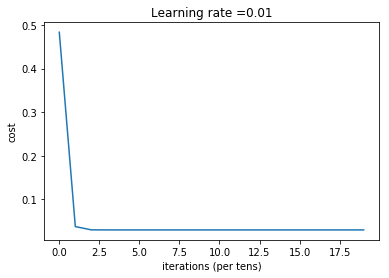

In [26]:
parameters = L_layer_model(X_train, Y_train, layers_dims, num_iterations = 2000, print_cost = True)

In [27]:
A,caches = forward_prop(X_train, parameters)
print("Training set accuracy")
p=np.sum([np.abs(A-Y_train)<0.2])
print(p/(2*Y_train.shape[1])*100)


Training set accuracy
65.21739130434783


In [28]:
A,caches = forward_prop(X_test, parameters)
print("Test set accuracy")
p=np.sum([np.abs(A-Y_test)<0.2])
print(p/(2*Y_test.shape[1])*100)

Test set accuracy
60.0
